### load the dataset

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.graph_objs as go

In [3]:
cf.go_offline()

In [7]:
train = pd.read_csv('training_data.csv', low_memory=False)

In [13]:
train

,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country
0,Remember the #WuhanCoronaVirus? The pandemic w...,NaN,FALSE,TRUE,WuhanCoronaVirus KillerCuomo,us
1,My sources @WhiteHouse say 2 tactics will be u...,NaN,FALSE,TRUE,Trump,us
2,I'll venture a wild guess: If you were running...,NaN,FALSE,TRUE,COVID19,us
3,#Pakistan (#GreenStimulus = #Nature protection...,NaN,FALSE,TRUE,Pakistan GreenStimulus Nature Green,us
4,🇺🇸 Pandémie de #coronavirus: 30 pasteurs améri...,NaN,FALSE,TRUE,coronavirus COVID__19 COVIDー19,us
...,...,...,...,...,...,...
239995,"Aa Likes, Retweets yentra 🙏\n🔥🔥🔥\n#Mastеr",NaN,TRUE,TRUE,Mastеr,new_zealand
239996,Very interesting\nAny thoughts?\n\n#TheFive #T...,NaN,FALSE,TRUE,TheFive Trump2020 KAG2020 mondaythoughts COVID...,new_zealand
239997,As we deal with #COVID19 don't forget that #Ch...,NaN,TRUE,TRUE,COVID19 Christians persecution Nigeria,new_zealand
239998,"While we hit 150,000 in #COVID19 deaths, the P...",NaN,FALSE,TRUE,COVID19,new_zealand


In [14]:
train.isnull().sum() # the reply_to_screen_name column misses too many data points, we can go ahead and drop it

text                         0
reply_to_screen_name    227937
is_quote                     0
is_retweet                   0
hashtags                     0
country                      0
dtype: int64

In [15]:
train.drop('reply_to_screen_name', axis=1, inplace=True)

In [18]:
train.head()

,text,is_quote,is_retweet,hashtags,country
0,Remember the #WuhanCoronaVirus? The pandemic w...,FALSE,TRUE,WuhanCoronaVirus KillerCuomo,us
1,My sources @WhiteHouse say 2 tactics will be u...,FALSE,TRUE,Trump,us
2,I'll venture a wild guess: If you were running...,FALSE,TRUE,COVID19,us
3,#Pakistan (#GreenStimulus = #Nature protection...,FALSE,TRUE,Pakistan GreenStimulus Nature Green,us
4,🇺🇸 Pandémie de #coronavirus: 30 pasteurs améri...,FALSE,TRUE,coronavirus COVID__19 COVIDー19,us


In [17]:
train.describe()

,text,is_quote,is_retweet,hashtags,country
count,240000,240000,240000,240000,240000
unique,191448,3,3,80149,6
top,"Amid America's #COVID19 disaster, I must come ...",FALSE,TRUE,COVID19,us
freq,198,199277,161890,58516,40000


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text        240000 non-null  object
 1   is_quote    240000 non-null  object
 2   is_retweet  240000 non-null  object
 3   hashtags    240000 non-null  object
 4   country     240000 non-null  object
dtypes: object(5)
memory usage: 9.2+ MB


### EDA

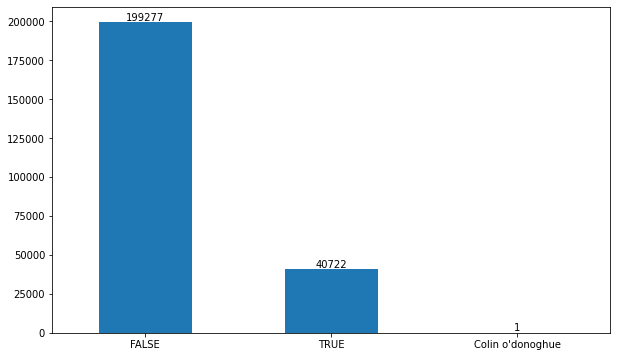

In [32]:
train['is_quote'].value_counts().plot(kind='bar')
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=360)
fig = plt.gcf()
fig.set_size_inches(10,6) # there is one data point that's probably recorded wrong, we can drop it 

In [46]:
train = train[train['is_quote']!= "Colin o'donoghue"]

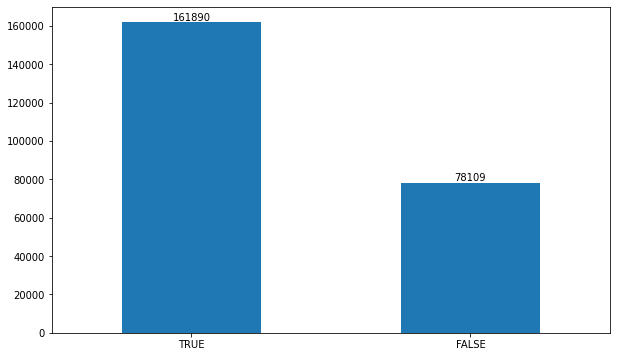

In [47]:
train['is_retweet'].value_counts().plot(kind='bar')
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=360)
fig = plt.gcf()
fig.set_size_inches(10,6)

In [247]:
top_20_hashtags = train['hashtags'].value_counts()[:20].reset_index()
fig = px.bar(top_20_hashtags, y='index', x='hashtags',color='index', text='hashtags',title='Top 20 hashtags in the covid tweets')
fig.show()

In [93]:
train['country'].value_counts() # notice that one tweet from ireland was recorded wrong, we dropped it. 

us             40000
uk             40000
canada         40000
australia      40000
new_zealand    40000
ireland        39999
Name: country, dtype: int64

In [96]:
train['len_of_#'] = train['hashtags'].apply(lambda x: x.split()).apply(len)

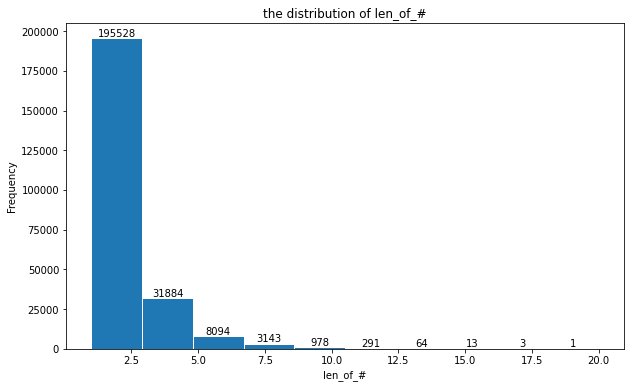

In [214]:
train['len_of_#'].plot.hist(edgecolor='white',bins=10 )
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i)
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title('the distribution of len_of_#')
plt.xlabel('len_of_#');# the longest hashtag is 20 in length

In [117]:
train['len_of_twt'] = train['text'].apply(lambda x:x.split()).apply(len)

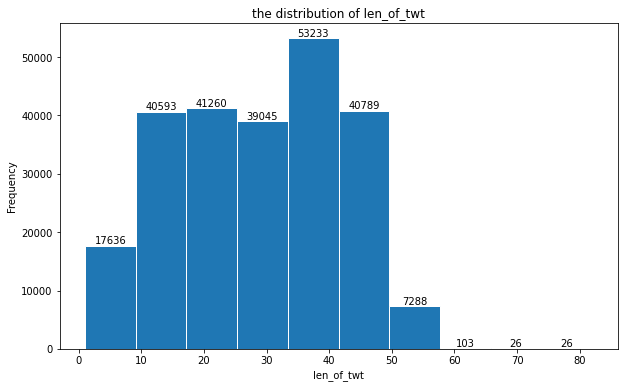

In [216]:
train['len_of_twt'].plot.hist(edgecolor='white', bins=10)
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i)
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title('the distribution of len_of_twt')
plt.xlabel('len_of_twt');

In [204]:
train.head()

,text,is_quote,is_retweet,hashtags,country,len_of_#,len_of_twt
0,Remember the #WuhanCoronaVirus? The pandemic w...,FALSE,TRUE,WuhanCoronaVirus KillerCuomo,us,2,41
1,My sources @WhiteHouse say 2 tactics will be u...,FALSE,TRUE,Trump,us,1,48
2,I'll venture a wild guess: If you were running...,FALSE,TRUE,COVID19,us,1,50
3,#Pakistan (#GreenStimulus = #Nature protection...,FALSE,TRUE,Pakistan GreenStimulus Nature Green,us,4,31
4,🇺🇸 Pandémie de #coronavirus: 30 pasteurs améri...,FALSE,TRUE,coronavirus COVID__19 COVIDー19,us,3,35


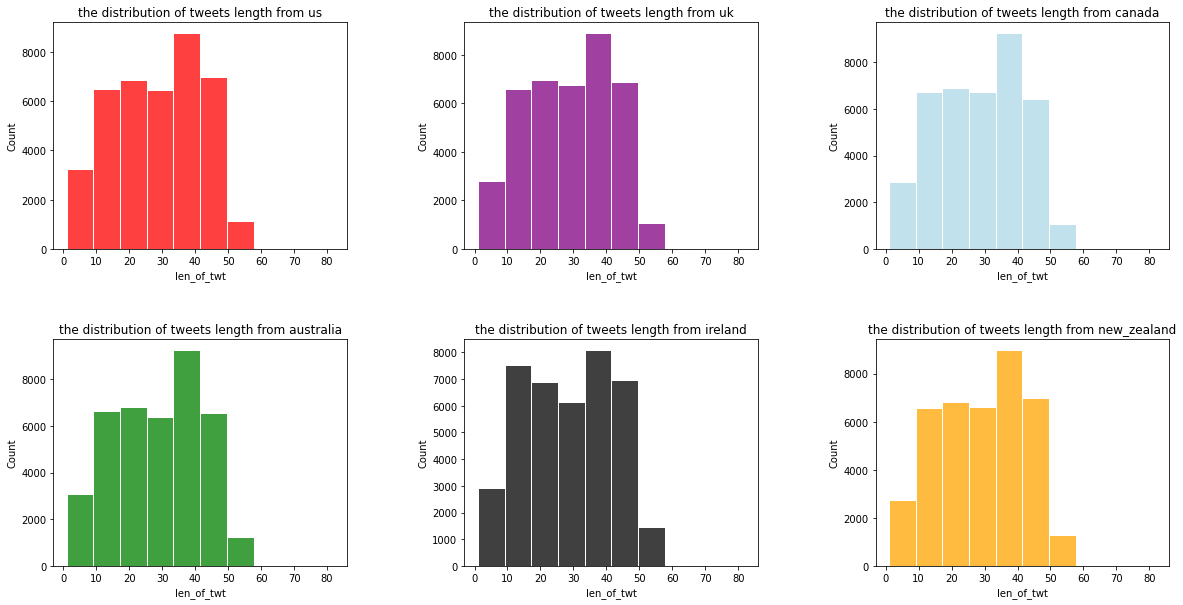

In [198]:
fig,axes = plt.subplots(2,3, figsize=(20,10), gridspec_kw=dict(hspace=0.4,wspace=0.4 ))
country = train['country'].unique()
color = ['red', 'purple', 'lightblue', 'green', 'black', 'orange']
for i, ax in enumerate(axes.flat):
    sns.histplot(train[train['country']==country[i]]['len_of_twt'], bins=10, edgecolor='white', label=country[i], ax=ax, color=color[i])
    ax.set_title(f'the distribution of tweets length from {country[i]}') # similar distribution of tweet length among countries

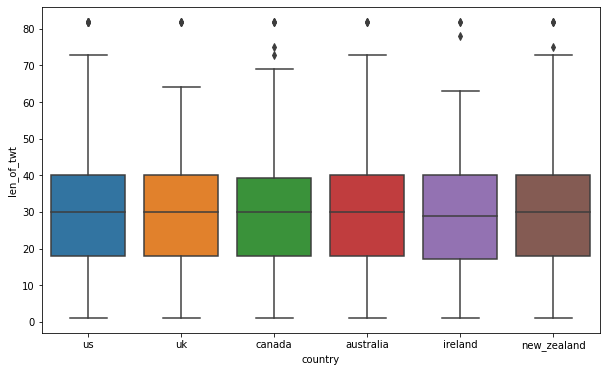

In [251]:
sns.boxplot(data=train, x='country', y='len_of_twt')
plt.xticks(rotation=360)
fig = plt.gcf()
fig.set_size_inches(10,6);

In [217]:
avg_twt_len = train.groupby('country').mean()['len_of_twt'].reset_index()
avg_hashtag_len = train.groupby('country').mean()['len_of_#'].reset_index()

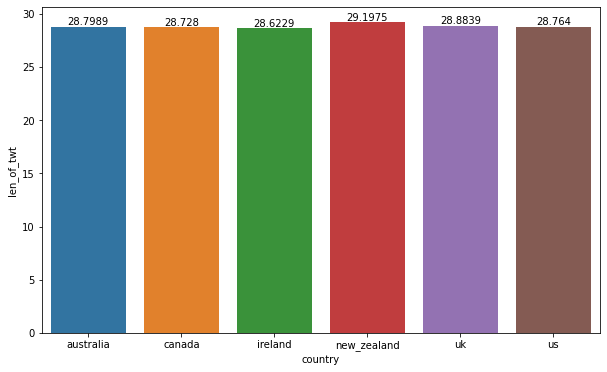

In [210]:
sns.barplot(data=avg_twt_len, x='country',y='len_of_twt')
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i)
fig = plt.gcf()
fig.set_size_inches(10,6) # there is not too much different in terms of avg_twt_len

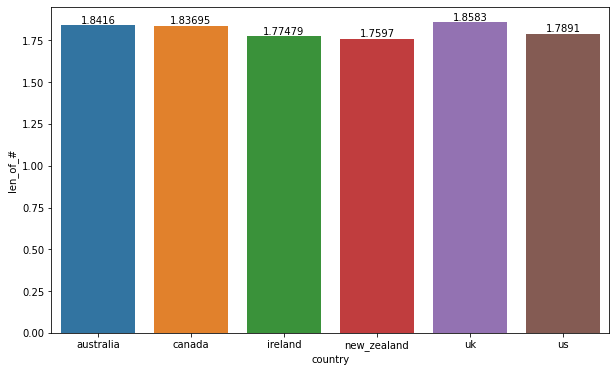

In [219]:
sns.barplot(data=avg_hashtag_len, x='country',y='len_of_#')
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i)
fig = plt.gcf()
fig.set_size_inches(10,6) # there is not too much different in terms of avg_twt_len